Regression

Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install -q git+https://github.com/tensorflow/docs

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)


2.2.0


In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Import Data

In [9]:
raw_dataset=pd.read_csv('kc_house_data.csv')

In [10]:
dataset=raw_dataset.copy()

In [11]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
dataset=dataset[['bedrooms','bathrooms','sqft_living','floors']]

In [14]:
dataset.describe()

,bedrooms,bathrooms,sqft_living,floors
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.494309
std,0.930062,0.770163,918.440897,0.539989
min,0.000000,0.000000,290.000000,1.000000
25%,3.000000,1.750000,1427.000000,1.000000
50%,3.000000,2.250000,1910.000000,1.500000
75%,4.000000,2.500000,2550.000000,2.000000
max,33.000000,8.000000,13540.000000,3.500000


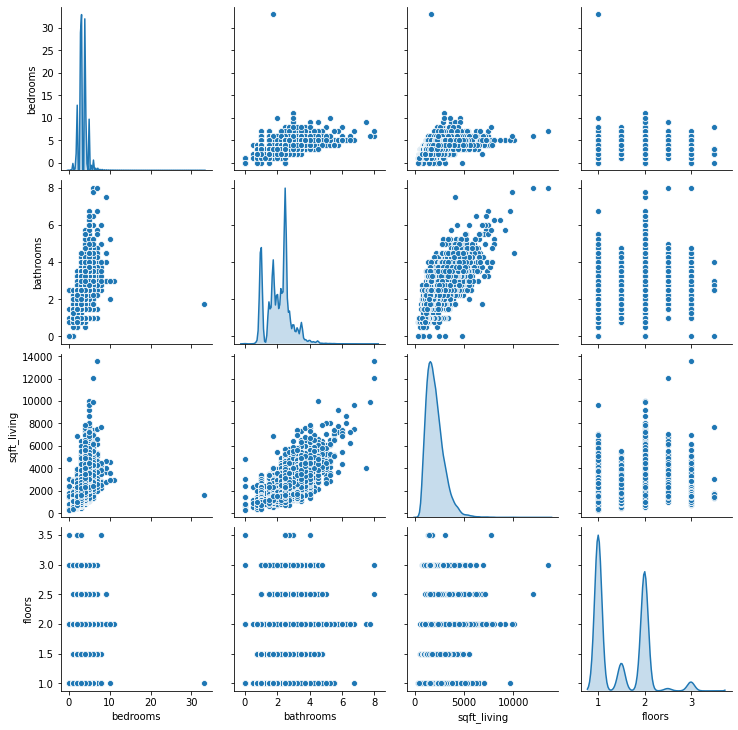

In [16]:
sns.pairplot(dataset[['bedrooms','bathrooms','sqft_living','floors']],diag_kind="kde")

Splitting Dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=dataset[['bedrooms','bathrooms','sqft_living','floors']]

In [20]:
y=raw_dataset['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape

(17290, 4)

In [23]:
y_train.shape

(17290,)

In [30]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,floors
count,17290.000000,17290.000000,17290.000000,17290.000000
mean,3.367843,2.118291,2081.416715,1.498062
std,0.943132,0.772249,923.244576,0.542603
min,0.000000,0.000000,290.000000,1.000000
25%,3.000000,1.750000,1420.000000,1.000000
50%,3.000000,2.250000,1920.000000,1.500000
75%,4.000000,2.500000,2550.000000,2.000000
max,33.000000,8.000000,13540.000000,3.500000


In [31]:
train_stats=X_train.describe()
train_stats=train_stats.transpose()

In [32]:
train_stats

,count,mean,std,min,25%,50%,75%,max
bedrooms,17290.0,3.367843,0.943132,0.0,3.00,3.00,4.0,33.0
bathrooms,17290.0,2.118291,0.772249,0.0,1.75,2.25,2.5,8.0
sqft_living,17290.0,2081.416715,923.244576,290.0,1420.00,1920.00,2550.0,13540.0
floors,17290.0,1.498062,0.542603,1.0,1.00,1.50,2.0,3.5


# Normailization

In [61]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [62]:
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

In [64]:
normed_train_data

,bedrooms,bathrooms,sqft_living,floors
5268,-0.390023,-1.448095,-0.553934,-0.917914
16909,-0.390023,0.494282,-0.326475,-0.917914
16123,-0.390023,-0.800636,-1.073840,-0.917914
12181,0.670275,0.494282,0.139273,0.925056
12617,-0.390023,0.494282,-0.304813,0.925056
...,...,...,...,...
13123,1.730572,3.731578,2.034762,0.925056
19648,-1.450320,0.494282,-0.738067,0.925056
9845,-0.390023,0.170553,0.301744,-0.917914
10799,0.670275,-0.153177,0.312575,0.925056


In [65]:
y_train

5268      495000.0
16909     635000.0
16123     382500.0
12181     382500.0
12617     670000.0
           ...    
13123    1180000.0
19648     299000.0
9845      431000.0
10799     411000.0
2732      699900.0
Name: price, Length: 17290, dtype: float64

In [66]:
X_train.keys()

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors'], dtype='object')

3 Layer Neural Network

In [73]:
# Here, we'll use a Sequential model with two densely connected hidden layers, 
#and an output layer that returns a single, continuous value.
def build_model():
  model=keras.Sequential([
        layers.Dense(64,activation='relu',input_shape=[len(X_train.keys())]),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(1)        
    ])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
  return model

In [74]:
model=build_model()

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Train the model for 1000 epochs, and record the training and validation accuracy in the history object.
EPOCHS=50
history=model.fit(
normed_train_data,y_train,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:351959220224.0000,  mae:467403.3750,  mse:351959220224.0000,  val_loss:111880904704.0000,  val_mae:226324.6406,  val_mse:111880904704.0000,  
..................................................

In [77]:
history

In [78]:
# Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
45,6.356620e+10,164688.531250,6.356620e+10,5.656473e+10,164804.484375,5.656473e+10,45
46,6.352291e+10,164977.593750,6.352291e+10,5.636564e+10,163961.000000,5.636564e+10,46
47,6.360262e+10,164967.750000,6.360262e+10,5.590537e+10,161570.546875,5.590537e+10,47
48,6.356172e+10,164802.875000,6.356172e+10,5.623697e+10,163513.296875,5.623697e+10,48
49,6.347500e+10,165003.578125,6.347500e+10,5.584525e+10,159181.265625,5.584525e+10,49


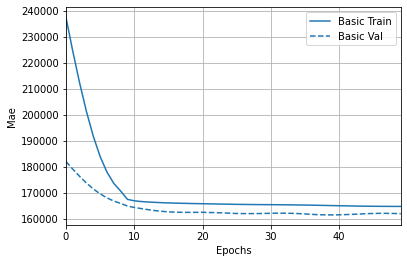

In [79]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
#plt.ylim([0, 10])
#plt.ylabel('MAE [price]')



Text(0, 0.5, 'MSE [price^2]')

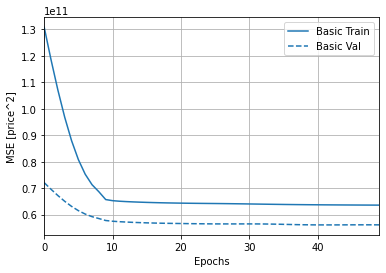

In [81]:
plotter.plot({'Basic': history}, metric = "mse")
#plt.ylim([0, 20])
plt.ylabel('MSE [price^2]')

In [82]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:371572867072.0000,  mae:483356.5000,  mse:371572867072.0000,  val_loss:156060368896.0000,  val_mae:274598.4375,  val_mse:156060368896.0000,  
..................................................

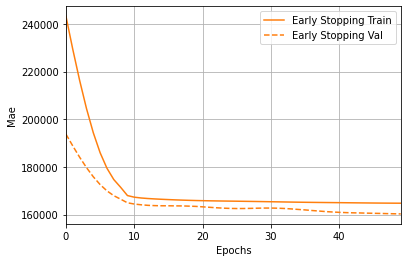

In [83]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
#plt.ylim([0, 10])
#plt.ylabel('MAE [MPG]')

In [84]:
loss, mae, mse = model.evaluate(normed_test_data, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))


136/136 - 0s - loss: 54819291136.0000 - mae: 157076.1250 - mse: 54819291136.0000
Testing set Mean Abs Error: 157076.12 


# Prediction

In [85]:
model.predict(normed_test_data).flatten()

array([ 510893.25, 1399538.2 ,  399663.66, ...,  353272.  ,  298477.3 ,
        401458.3 ], dtype=float32)

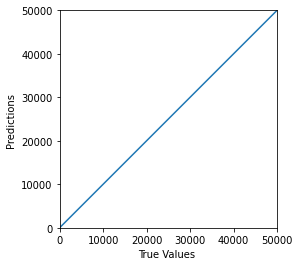

In [89]:
# Make predictions
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

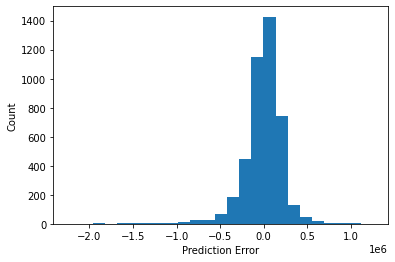

In [90]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")